In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datamodule.connectionDataBase import ConnectionDataBase
import queries.queries as qrs

Conexão base de dados PostgreSQL


In [21]:
conn = ConnectionDataBase()

Desconnected to base postgres


Carregamento genérico dos dados

In [22]:
def Dados(query):
    results = None
    connection = conn.Connection()
    connection.autocommit = False

    cursor = connection.cursor()
    try:
        cursor.execute(query)
        results = cursor.fetchall()
        connection.commit()
    except (Exception) as error:
        connection.rollback()
        print('error in query: ' + query, error)
        raise

    finally:
        if cursor is not None:
            if not cursor.closed:
                cursor.close()
    return results

In [23]:
def ShowBarplot(results):
    intervalos = [str(d[0]) + "%" for d in results]
    quantidades = [d[1] for d in results]

    sns.barplot(x=intervalos, y=quantidades)
    plt.xlabel("Acurácia")
    plt.ylabel("Qtd. Registros")
    plt.title("Contagem de registros por intervalo")

    for i in range(len(quantidades)):
        plt.text(i, quantidades[i], str(quantidades[i]), ha='center', va='bottom')

    plt.show()

In [24]:
def ShowPieplot(results):
    intervalos = [str(d[0]) + "%" for d in results]
    quantidades = [d[1] for d in results]

    colors = ['red', 'yellow', 'orange', 'cyan', 'blue', 'purple', 'pink', 'gray', 'brown', 'black', 'green']
    plt.figure(figsize=(10, 10))
    plt.pie(quantidades, colors=colors, autopct='%1.1f%%', startangle=90)

    legend = plt.legend(intervalos, title='Acurácia', loc='best')
    legend.set_title('Acurácia', prop={'size': 12})

    plt.axis('equal')
    plt.title('Distribuição da acurácia em relação ao total de registros')
    plt.show()

In [25]:
def ShowScatterplot(results):
    df = pd.DataFrame(results, columns=["acerto", "quantidade"])
    sns.scatterplot(data=df, x='acerto', y='quantidade')
    plt.title('Gráfico de dispersão com regressão linear')
    plt.show()

In [26]:
def ShowHistplot(results):
    pass

In [27]:
def NovoTeste(results):
    df = pd.DataFrame(results, columns=["acerto", "ppldpi", "tssdpi", "quantidade"])
    sns.relplot(data=df, x='acerto', y='quantidade', hue='ppldpi', style='tssdpi')

In [28]:
def TabelaMedia(results):    
    df = pd.DataFrame(results, columns=["media", "quantidade"])
    df["media"] = df["media"].apply(lambda x: "{:.2f}%".format(x))    
    print(df.to_string(index=False))

In [29]:
def Estatisticas(results):
    df = pd.DataFrame(results, columns=["idcombinacoes", "ppldpi", "ppltransparent", "pplgrayscale", "cvequalizehist", "cvnormalize", "tssdpi", "tssoem", "tsspsm", "acerto", "count"])
    
    # Criar um gráfico de barras
    plt.bar(df['idcombinacoes'], df['count'])

    # Adicionar um título ao gráfico
    plt.title('Número de vezes que cada combinação de parâmetros de imagem foi usada')

    # Adicionar um eixo x com rótulos
    plt.xlabel('Combinação de parâmetros de imagem')

    # Adicionar um eixo y com rótulos
    plt.ylabel('Número de vezes')

    # Exibir o gráfico
    plt.show()

    #################################################

    # Criar um gráfico de linha
    plt.plot(df['idcombinacoes'], df['acerto'])

    # Adicionar um título ao gráfico
    plt.title('Número de acertos por combinação de parâmetros de imagem')

    # Adicionar um eixo x com rótulos
    plt.xlabel('Combinação de parâmetros de imagem')

    # Adicionar um eixo y com rótulos
    plt.ylabel('Número de acertos')

    # Exibir o gráfico
    plt.show()

    #################################################

    # # Criar um gráfico de barras agrupado
    # plt.bar(df['idcombinacoes'], df['count'], hue=df['pplgrayscale'])

    # # Adicionar um título ao gráfico
    # plt.title('Número de vezes que cada combinação de parâmetros de imagem foi usada, agrupada por tipo de imagem')

    # # Adicionar um eixo x com rótulos
    # plt.xlabel('Combinação de parâmetros de imagem')

    # # Adicionar um eixo y com rótulos
    # plt.ylabel('Número de vezes')

    # # Exibir o gráfico
    # plt.show()

    #################################################

    # Criar um gráfico de dispersão
    plt.scatter(df['ppldpi'], df['acerto'])

    # Adicionar um título ao gráfico
    plt.title('Relação entre o número de acertos e o tamanho da imagem')

    # Adicionar um eixo x com rótulos
    plt.xlabel('Tamanho da imagem')

    # Adicionar um eixo y com rótulos
    plt.ylabel('Número de acertos')

    # Exibir o gráfico
    plt.show()

In [30]:
results = Dados(qrs.SELECT_CASE_COUNT_ESTATISTICA)

Connected to base postgres


bla bla

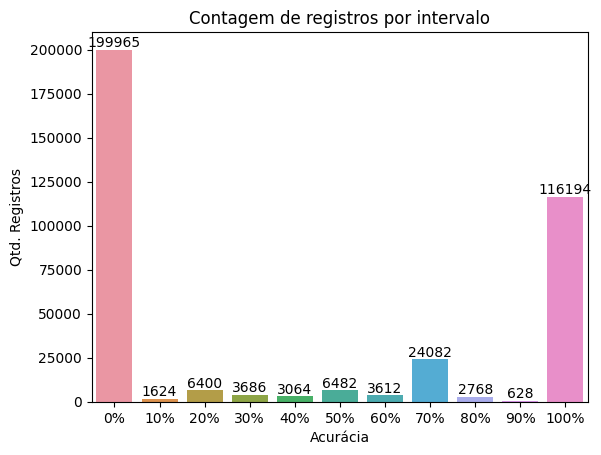

In [31]:
ShowBarplot(results)

bla bla

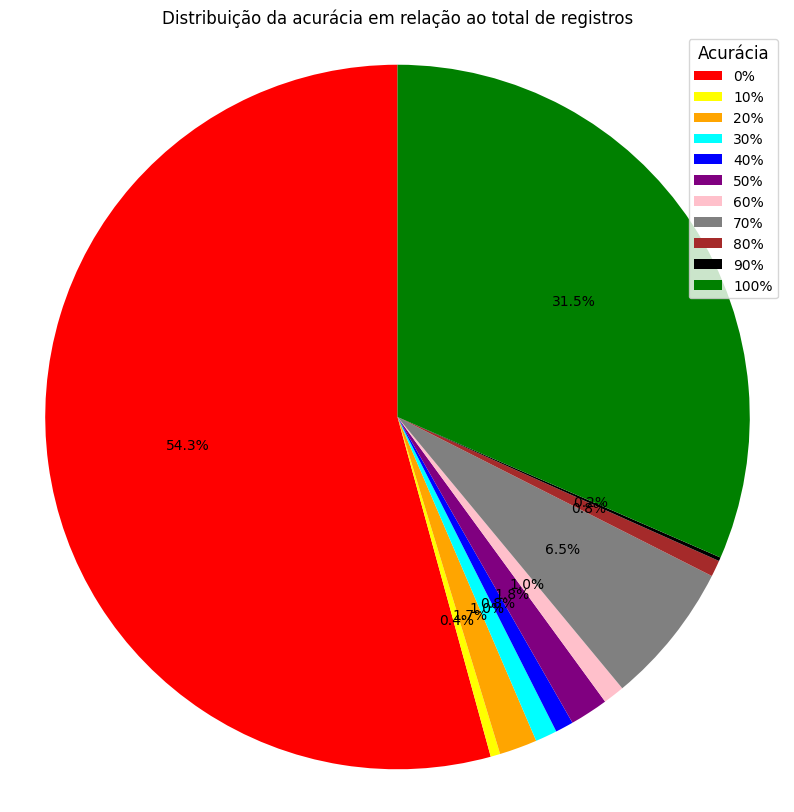

In [32]:
ShowPieplot(results)

bla bla

In [33]:
results = Dados(qrs.SELECT_ACERTO_QTD_EST)

bla bla

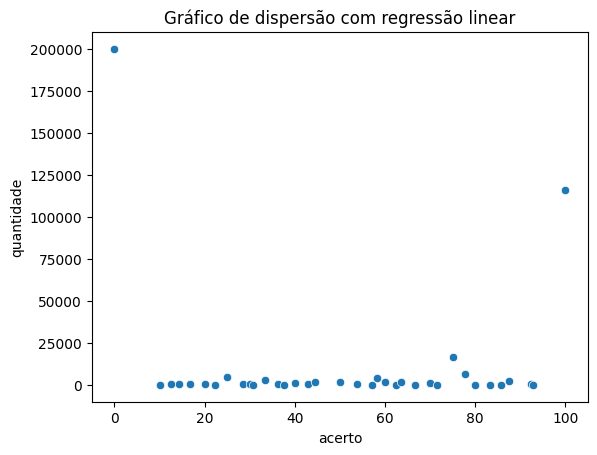

In [34]:
ShowScatterplot(results)

bla bla

In [35]:
ShowHistplot(results)

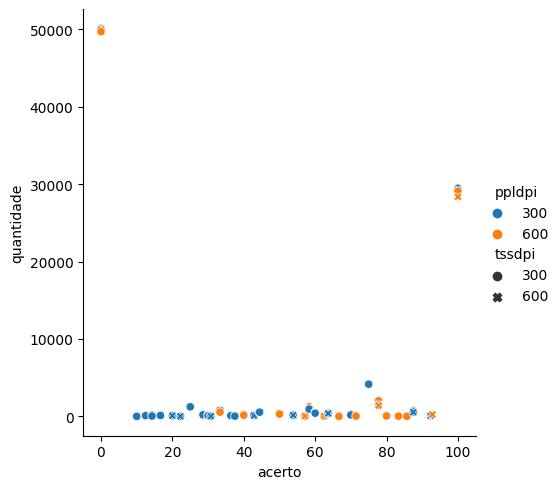

In [36]:
results = Dados(qrs.SELECT_RELACAO_DPI)
NovoTeste(results)

In [37]:
results = Dados(qrs.SELECT_MEDIA_TOTAL)
TabelaMedia(results)

 media  quantidade
40.06%      368505


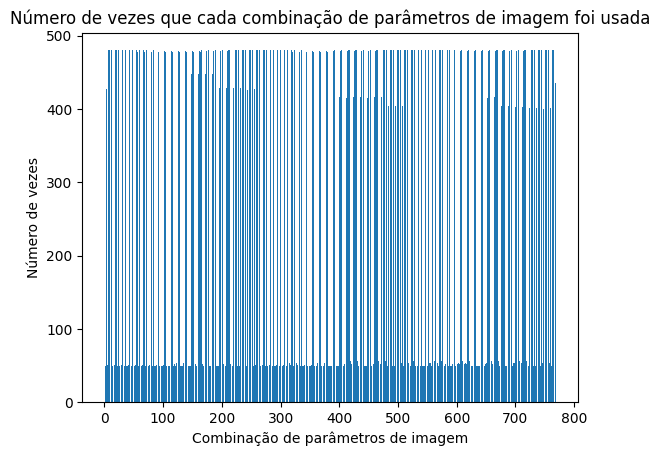

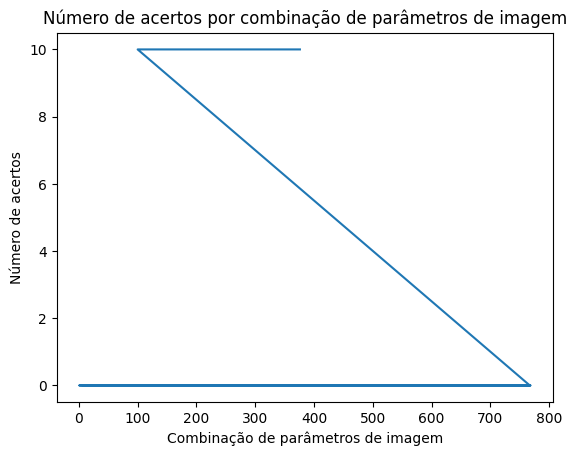

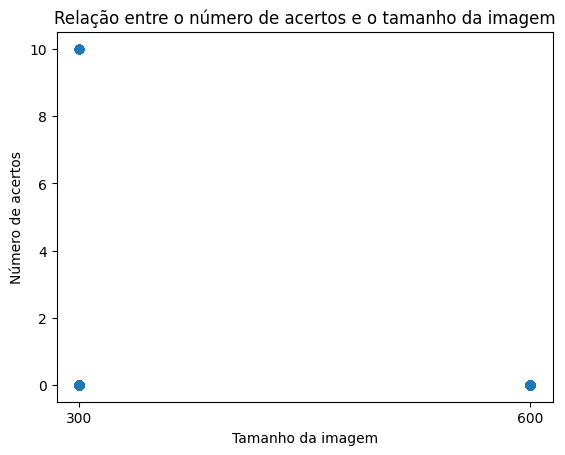

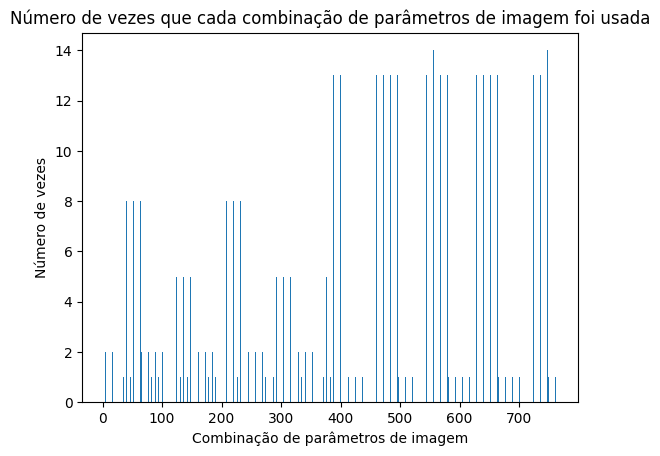

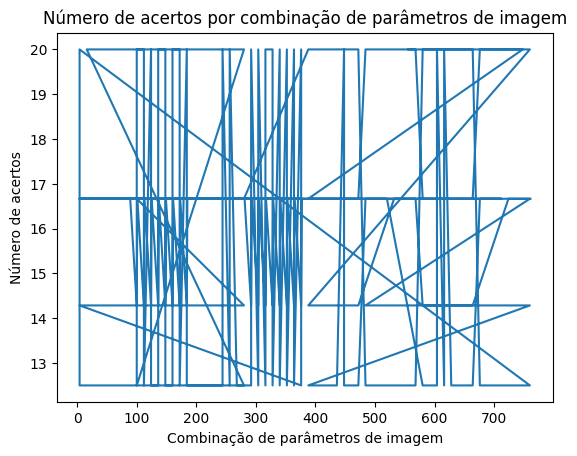

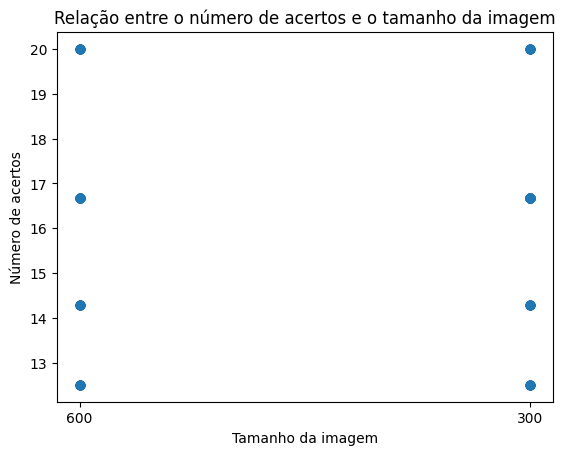

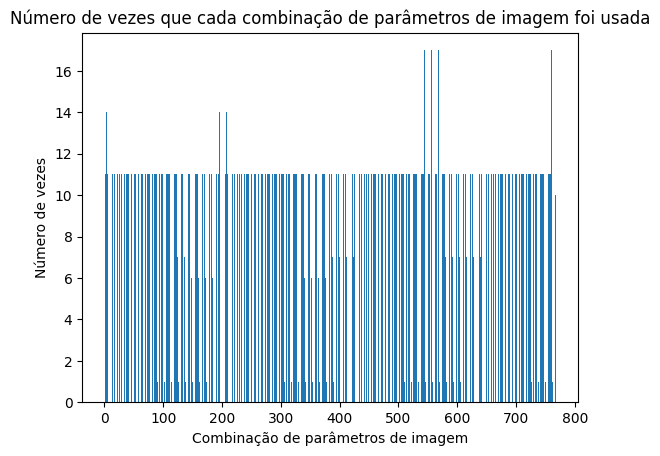

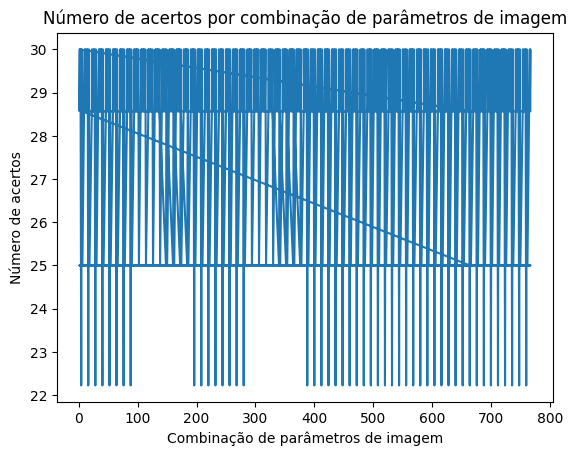

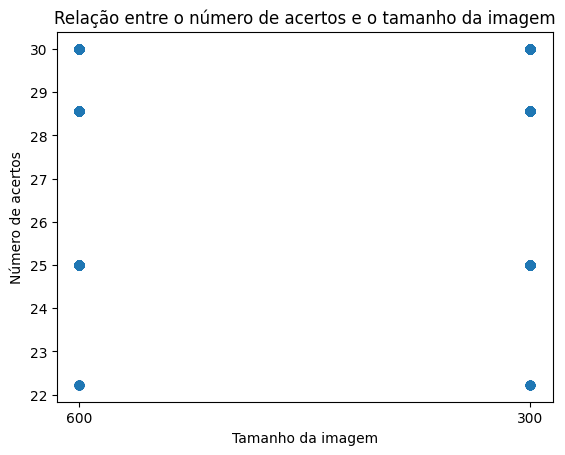

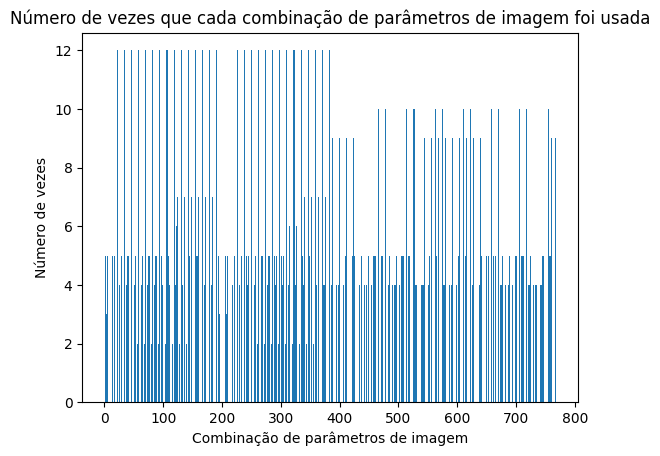

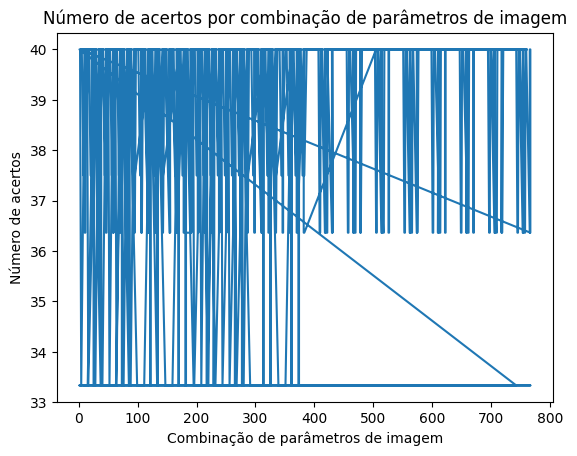

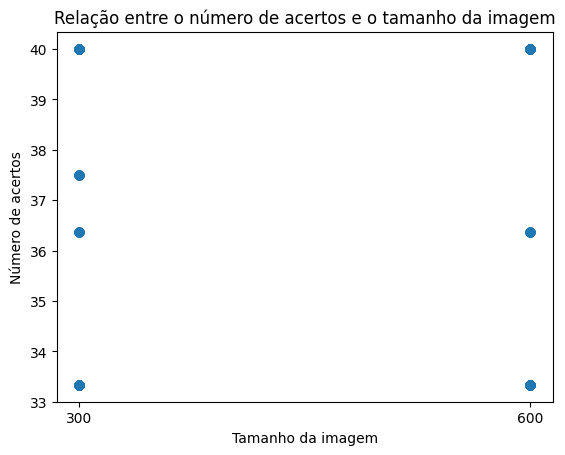

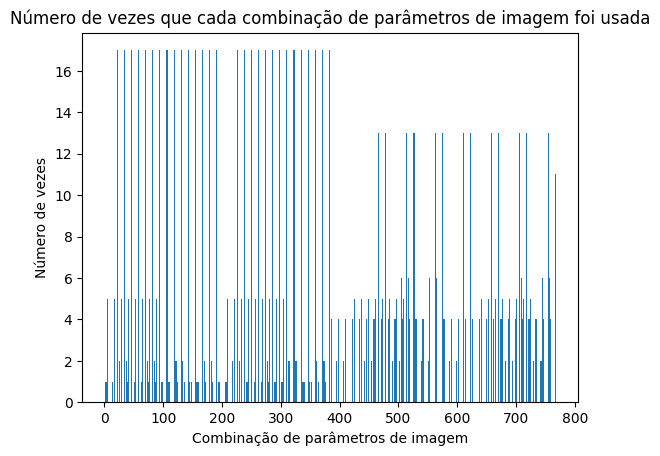

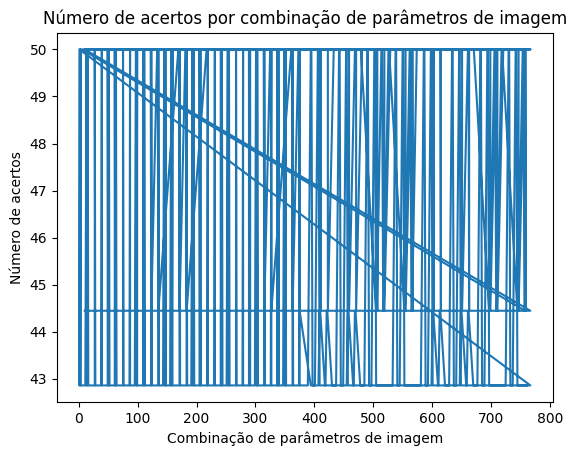

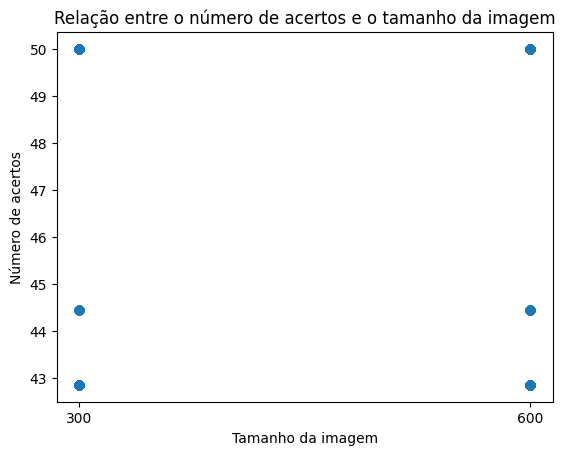

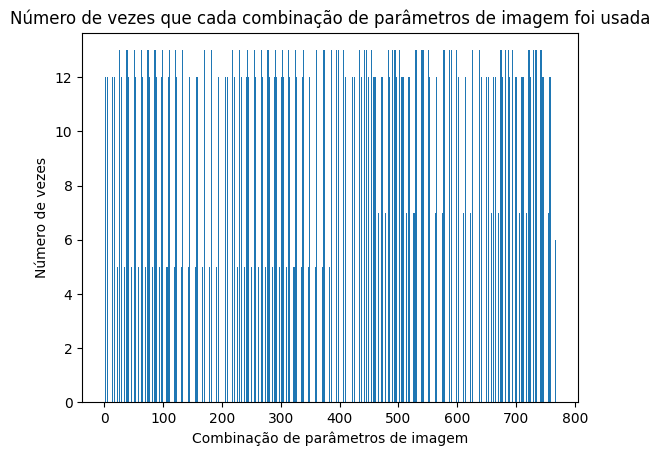

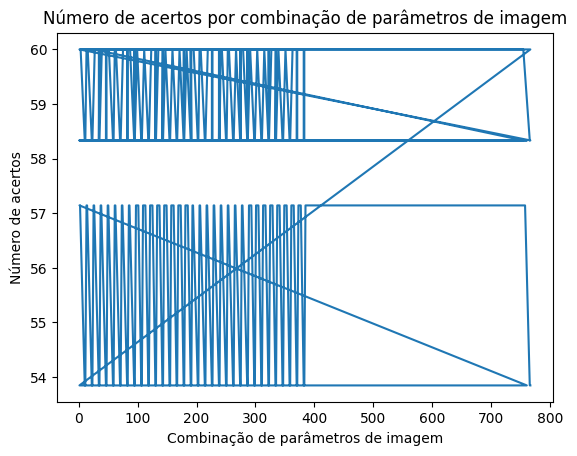

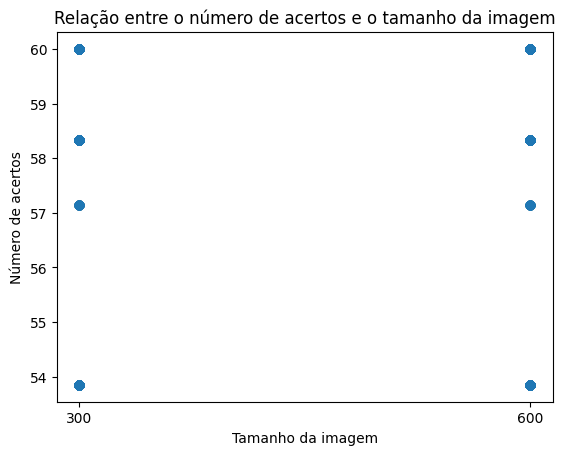

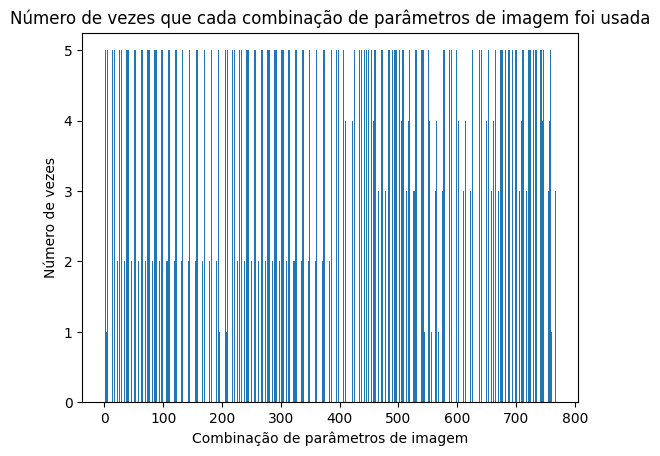

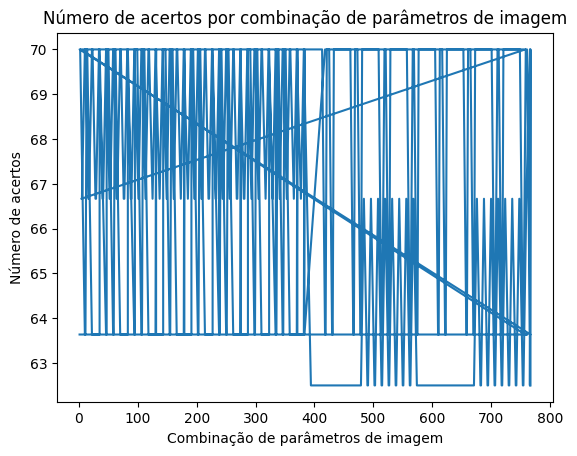

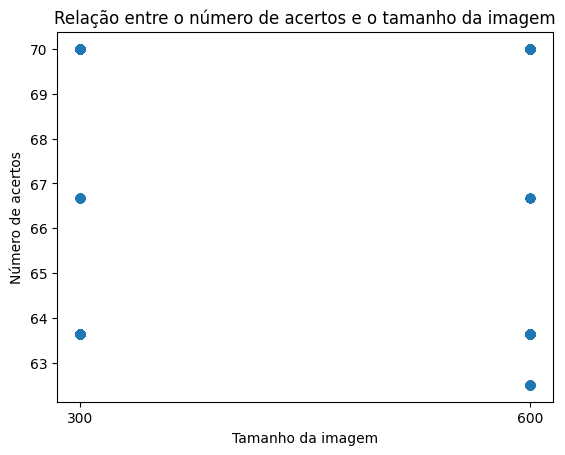

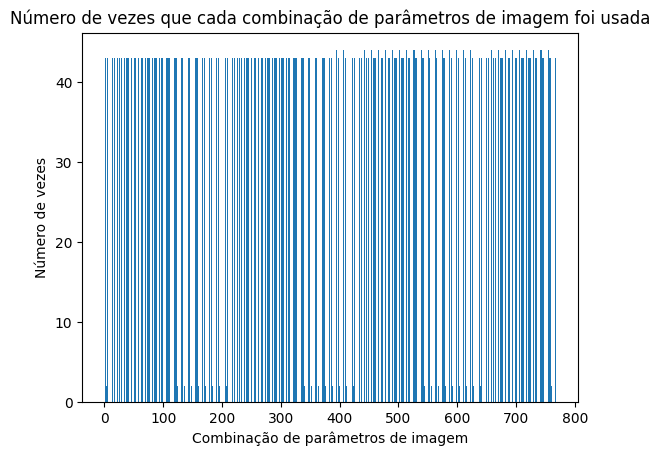

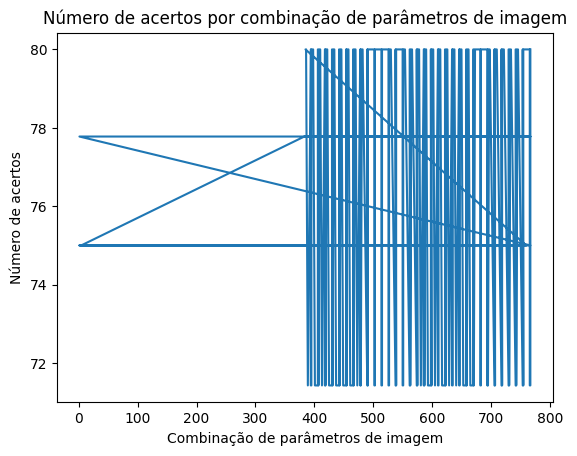

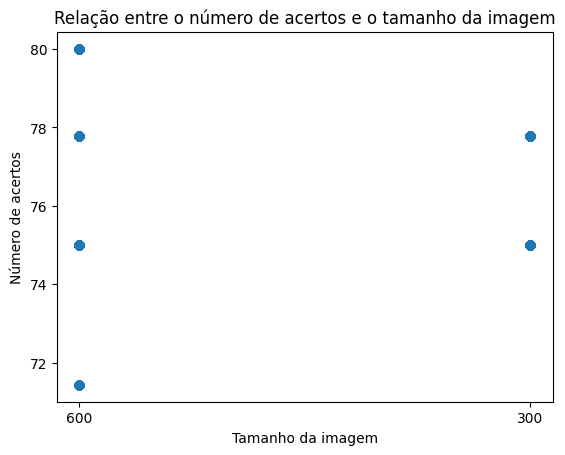

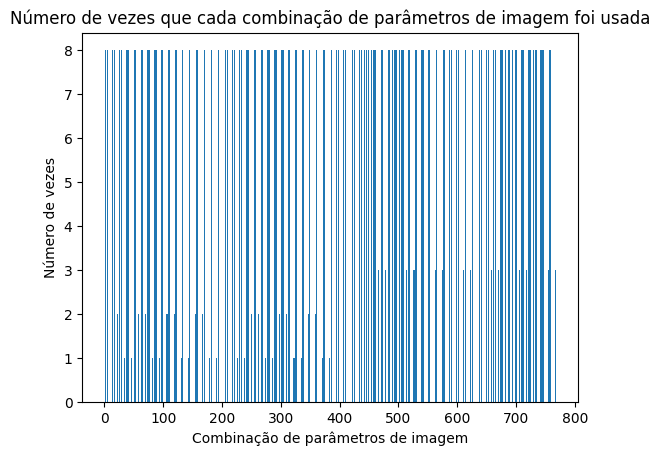

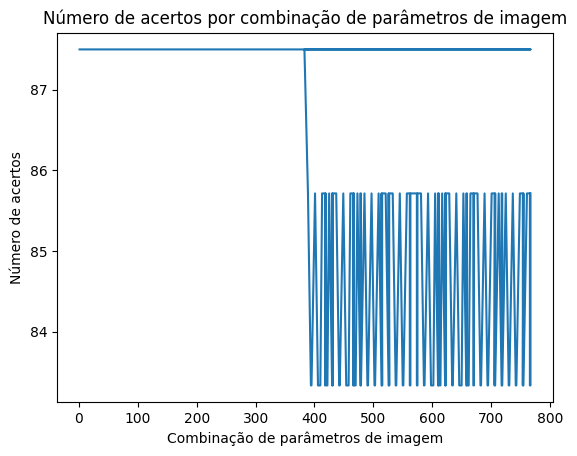

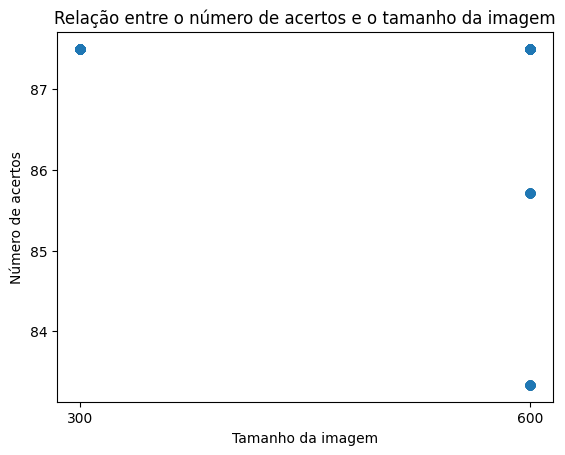

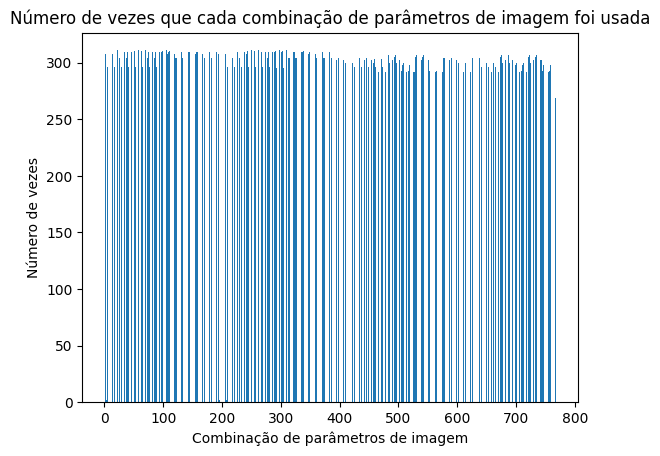

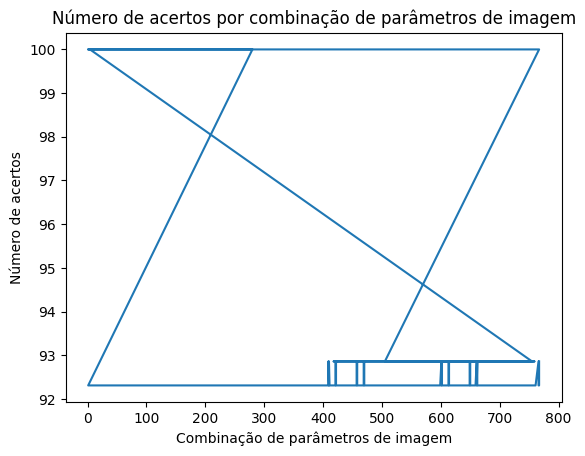

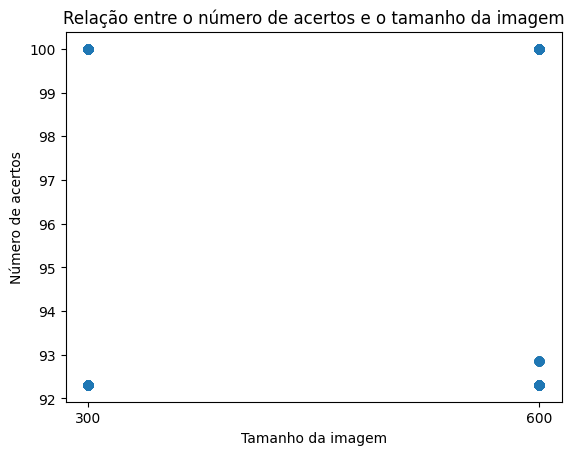

In [38]:
results = Dados(qrs.SELECT_ESTATISTICA.format(0, 10))
Estatisticas(results)

results = Dados(qrs.SELECT_ESTATISTICA.format(11, 20))
Estatisticas(results)

results = Dados(qrs.SELECT_ESTATISTICA.format(21, 30))
Estatisticas(results)

results = Dados(qrs.SELECT_ESTATISTICA.format(31, 40))
Estatisticas(results)

results = Dados(qrs.SELECT_ESTATISTICA.format(41, 50))
Estatisticas(results)

results = Dados(qrs.SELECT_ESTATISTICA.format(51, 60))
Estatisticas(results)

results = Dados(qrs.SELECT_ESTATISTICA.format(61, 70))
Estatisticas(results)

results = Dados(qrs.SELECT_ESTATISTICA.format(71, 80))
Estatisticas(results)

results = Dados(qrs.SELECT_ESTATISTICA.format(81, 90))
Estatisticas(results)

results = Dados(qrs.SELECT_ESTATISTICA.format(91, 100))
Estatisticas(results)